In [ ]:
from google.colab import drive
from os import path
import os
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!pip install neuralprophet
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 74 kB 2.4 MB/s 
     |████████████████████████████████| 172 kB 11.1 MB/s 
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from neuralprophet import NeuralProphet
import pandas as pd


In [ ]:
os.listdir('gdrive/My Drive/Colab Notebooks/waterlevel/')

['biligundulu.csv',
 'chunchunakate.csv',
 'kodumudi.csv',
 'kollegal.csv',
 'kudige.csv',
 'musiri.csv',
 'urachikottai.csv',
 'waterflow.csv']

In [ ]:
a=input()

waterflow


In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
# load data
path = 'gdrive/My Drive/Colab Notebooks/waterlevel/'+a+'.csv'
df = read_csv(path, header=0)
# summarize shape
print(df.shape)
# show first few rows
#df=df.drop(['Last 10 Year Average (Flow in cumecs)', 'Last Year (Flow in cumecs)', 'Level (m)'], axis=1)
df=df.dropna()
print(df)

(183, 2)
      Dates  Current Year (Flow in cumecs)
0    Jan-07                      70.414378
1    Feb-07                     240.697004
2    Mar-07                      52.299000
3    Apr-07                      25.275869
4    May-07                      23.564898
..      ...                            ...
139  Aug-18                     152.779833
140  Sep-18                     108.089833
141  Oct-18                      49.786000
142  Nov-18                      27.317333
143  Dec-18                       7.826000

[144 rows x 2 columns]


In [ ]:
def format_date(a):
    x = a.split("-")
    month={'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07','Aug':'08','Sep':'09',
         'Oct':'10','Nov':'11','Dec':'12' }
    return('20'+x[1]+'-'+month[x[0]]+'-01')

df['Dates'] = df['Dates'].apply(format_date)
df = df[df['Current Year (Flow in cumecs)'] != '-']
df['Current Year (Flow in cumecs)']=df['Current Year (Flow in cumecs)'].astype(float)

df

,Dates,Current Year (Flow in cumecs)
0,2007-01-01,70.414378
1,2007-02-01,240.697004
2,2007-03-01,52.299000
3,2007-04-01,25.275869
4,2007-05-01,23.564898
...,...,...
139,2018-08-01,152.779833
140,2018-09-01,108.089833
141,2018-10-01,49.786000
142,2018-11-01,27.317333


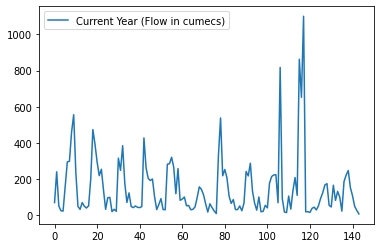

In [ ]:
from matplotlib import pyplot
df.plot()
pyplot.show()

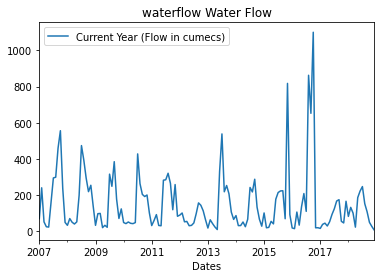

In [ ]:


df['Dates']= pd.to_datetime(df['Dates'])
df.plot(x='Dates',title=a+' Water Flow')


df.columns = ['ds', 'y']

In [ ]:
tdf=df.groupby(df.ds.dt.year)['y'].transform('mean')
l=[]
for i in tdf:
  if i not in l:
    l.append(i)
l

[205.82155997916666,
 185.26566233916665,
 135.8179877525,
 139.10610944166666,
 155.22688260916667,
 82.00796244583334,
 156.63078057475,
 105.99644356083333,
 171.66225009666667,
 273.7978403075,
 84.29042746416667,
 111.80323609999999]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning



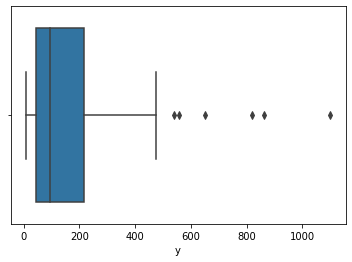

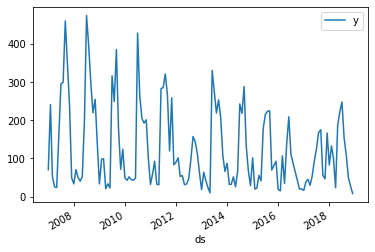

In [ ]:
import seaborn as sns
sns.boxplot(df['y'])
import numpy as np

Q1 = np.percentile(df['y'], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(df['y'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1


# Upper bound
upper = np.where(df['y'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['y'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

from matplotlib import pyplot
df.plot(x='ds')
pyplot.show()

In [ ]:
df

,ds,y
0,2007-01-01,70.414378
1,2007-02-01,240.697004
2,2007-03-01,52.299000
3,2007-04-01,25.275869
4,2007-05-01,23.564898
...,...,...
139,2018-08-01,152.779833
140,2018-09-01,108.089833
141,2018-10-01,49.786000
142,2018-11-01,27.317333


In [ ]:
# define the model

model = NeuralProphet(epochs=100)
# fit the model

model.fit(df)


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 87.681% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


  0%|          | 0/109 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.81E-02, min: 1.47E-01


  0%|          | 0/109 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.25E-02, min: 1.78E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.25E-02
Epoch[100/100]: 100%|██████████| 100/100 [00:02<00:00, 34.88it/s, SmoothL1Loss=0.0218, MAE=49.5, RMSE=64, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.659795,336.434465,401.631429,0.0
1,0.642187,330.229548,398.931052,0.0
2,0.613494,320.126030,387.223891,0.0
3,0.568447,304.199658,370.225562,0.0
4,0.502488,279.853187,340.151282,0.0
...,...,...,...,...
95,0.021807,49.570770,63.275167,0.0
96,0.021808,49.567328,64.049087,0.0
97,0.021800,49.550699,62.966955,0.0
98,0.021800,49.547523,64.130984,0.0


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 87.681% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 87.742% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 87.742% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()



          ds           y       yhat1   residual1       trend  season_yearly
0 2007-01-01   70.414378  106.466370   36.051991  171.819504     -65.353142
1 2007-02-01  240.697004  117.765030 -122.931974  170.837982     -53.072941
2 2007-03-01   52.299000  119.560944   67.261944  169.951416     -50.390469
3 2007-04-01   25.275869   78.118423   52.842555  168.969879     -90.851456
4 2007-05-01   23.564898  116.732239   93.167341  168.020004     -51.287754


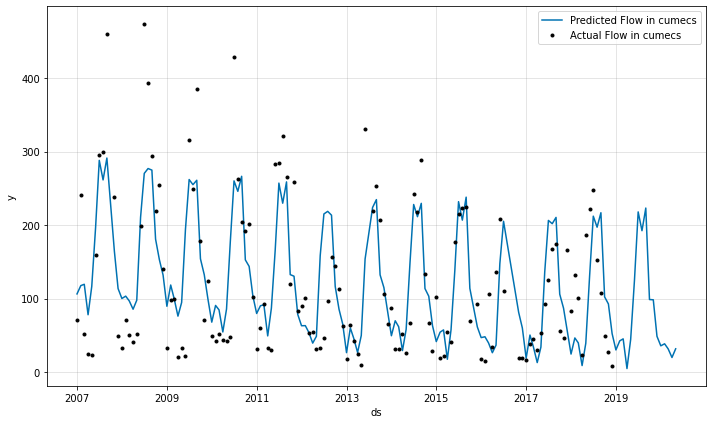

In [ ]:
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot

future = model.make_future_dataframe(df, periods=17, n_historic_predictions=len(df))
forecast = model.predict(future)
# summarize the forecast
print(forecast.head())
forecast['yhat1'][forecast['yhat1'] < 0] = 0
# plot forecast
model.plot(forecast)
pyplot.legend(['Predicted Flow in cumecs', 'Actual Flow in cumecs'])
pyplot.show()


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df['y'], forecast['yhat1'][:-17])

49.545555205181564

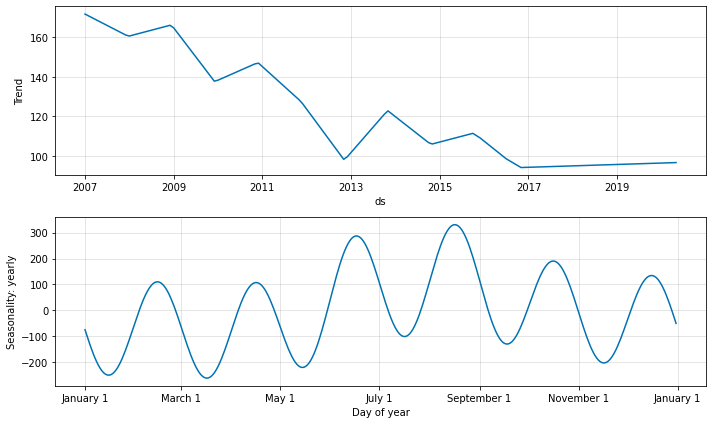

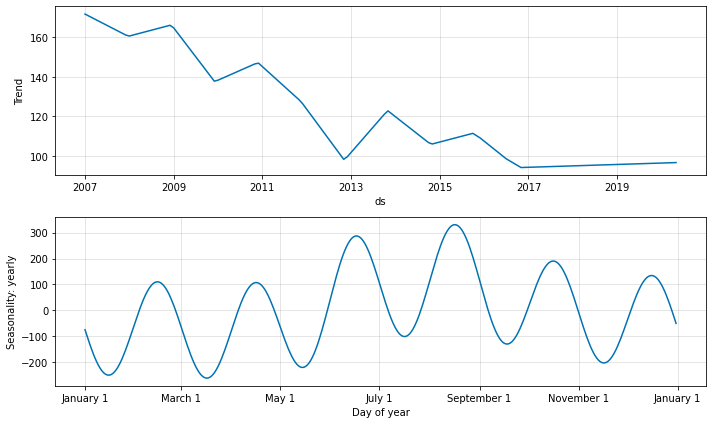

In [ ]:
model.plot_components(forecast)